In [1]:
litery = '#fff2cc'
tlo = "#783f04"
wymiar1 = '410%'
wymiar2 = '250%'

https://yagisanatode.com/google-apps-script-hexadecimal-color-codes-for-google-docs-sheets-and-slides-standart-palette/

In [2]:
from IPython.display import display, HTML

def pokaz_tekst(tlo, litery, wymiar, tekst):
    html_code = f"<span style='font-size: {wymiar}; background: {tlo}; font-weight: bold; color: {litery}'>{tekst}</span>"
    display(HTML(html_code))

In [3]:
pokaz_tekst(tlo, litery, wymiar1, tekst="ŚCIĄGANIE Z GIT HUBA DO GCP")

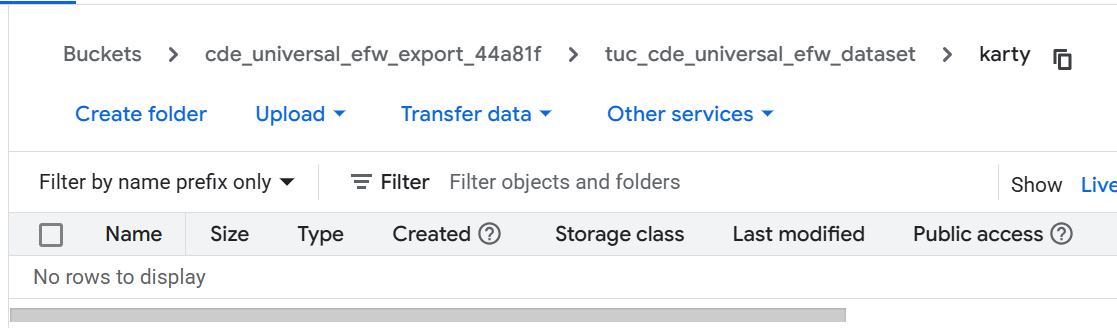

In [11]:
from pathlib import Path
from google.cloud import storage  # "C:\Users\GF2MOSH\Documents\creditcard.csv"

# === ====== ====== ====== ====== ====== ====== ===
bucket_name = "cde_universal_efw_export_44a81f"          # nazwa bucketu
prefix      = "tuc_cde_universal_efw_dataset/karty/"     # „folder” w bucketcie
CSV    = "creditcard.csv"                                  # nazwa pliku po stronie notebooka
# -----------------------------------

# 1) Pobieramy plik jeśli nie istnieje w katalogu roboczym
import os, requests, shutil, pathlib, google.cloud.storage as gcs

if not pathlib.Path(CSV).is_file():
     # publiczny adres github tego pliku creditcards.csv
    url = "https://raw.githubusercontent.com/shalakasaraogi/credit-card-fraud-detection/main/csv%20files/creditcard.csv" 
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(CSV, "wb") as f:
            shutil.copyfileobj(r.raw, f)
    print("Pobrano creditcard.csv")

# 2) Upload do Cloud Storage
client = gcs.Client()          # domyślny service-account
blob   = client.bucket(bucket_name).blob(f"{prefix}{CSV}")
blob.upload_from_filename(CSV)
print(f" Wysłano: gs://{bucket_name}/{prefix}{CSV}")

 Wysłano: gs://cde_universal_efw_export_44a81f/tuc_cde_universal_efw_dataset/karty/creditcard.csv
